# Offchain Governance (Boardroom/Snapshot API)

In [2]:
import requests
from requests.structures import CaseInsensitiveDict

url = "https://api.boardroom.info/v1/protocols"

headers = CaseInsensitiveDict()
headers["accept"] = "application/json"


resp = requests.get(url, headers=headers)

In [12]:
jsonmm = resp.json()

In [4]:
import pandas as pd
import json
import ast

In [5]:
df = pd.json_normalize((ast.literal_eval(resp.text))['data'])

In [6]:
df.describe()

,totalProposals,totalVotes,uniqueVoters
count,103.000000,103.000000,103.000000
mean,49.970874,4213.941748,1014.815534
std,77.986859,10269.441665,1771.874330
min,0.000000,0.000000,0.000000
25%,7.000000,76.500000,30.500000
50%,20.000000,535.000000,278.000000
75%,55.000000,3730.500000,1030.000000
max,447.000000,78617.000000,8325.000000


In [7]:
df.head()

,cname,name,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type,associatedProtocols,associatedAddresses
0,1inch,1inch,[Protocol],3,214,175,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO,[],[]
1,aave,Aave,[Protocol],61,1909,962,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO,[],[]
2,aavegotchi,Aavegotchi,[Protocol],246,78617,6545,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO,[],[]
3,alchemist,Alchemist,[Service],24,521,301,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'mist', 'net...",DAO,[],[]
4,alchemixfinance,Alchemix Finance,[Protocol],40,6666,1715,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'alcx', 'net...",DAO,[],[]


In [8]:
df[["categories"]].describe()

,categories
count,103
unique,9
top,[Protocol]
freq,54


In [ ]:
df[["type"]].describe()

In [ ]:
df[["icons"]]

In [17]:
df3 = df[["icons"]]

In [18]:
df4= df3.explode('icons')

In [ ]:
df4.head()

In [22]:
df_final_url = (pd.DataFrame(df4["icons"].apply(pd.Series)))
df_final_url.head()

,0,adapter,size,url
0,NaN,default,thumb,https://assets.coingecko.com/coins/images/1346...
0,NaN,default,small,https://assets.coingecko.com/coins/images/1346...
0,NaN,default,large,https://assets.coingecko.com/coins/images/1346...
1,NaN,default,thumb,https://assets.coingecko.com/coins/images/1264...
1,NaN,default,small,https://assets.coingecko.com/coins/images/1264...


In [25]:
df_contract = df_final_url[["url"]]
df_contract.head()

,url
0,https://assets.coingecko.com/coins/images/1346...
0,https://assets.coingecko.com/coins/images/1346...
0,https://assets.coingecko.com/coins/images/1346...
1,https://assets.coingecko.com/coins/images/1264...
1,https://assets.coingecko.com/coins/images/1264...


In [23]:
df_tokens = df[["tokens"]]
df_tokens= df_tokens.explode('tokens')
df_final_tokens = (pd.DataFrame(df_tokens["tokens"].apply(pd.Series)))
df_final_tokens.head()

,0,adapter,contractAddress,marketPrices,network,symbol
0,NaN,default,0x111111111117dc0aa78b770fa6a738034120c302,"[{'currency': 'usd', 'price': 1.5}]",ethereum,1inch
1,NaN,default,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,"[{'currency': 'usd', 'price': 140.19}]",ethereum,aave
2,NaN,default,0x3f382dbd960e3a9bbceae22651e88158d2791550,"[{'currency': 'usd', 'price': 2.01}]",ethereum,ghst
3,NaN,default,0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab,"[{'currency': 'usd', 'price': 19.73}]",ethereum,mist
4,NaN,default,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,"[{'currency': 'usd', 'price': 138.13}]",ethereum,alcx


In [87]:
df_contract = df_final_tokens[["contractAddress", "network","symbol"]]
df_contract.head(20)

,contractAddress,network,symbol
0,0x111111111117dc0aa78b770fa6a738034120c302,ethereum,1inch
1,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,ethereum,aave
2,0x3f382dbd960e3a9bbceae22651e88158d2791550,ethereum,ghst
3,0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab,ethereum,mist
4,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,ethereum,alcx
5,0xd46ba6d942050d489dbd938a2c909a5d5039a161,ethereum,ampl
6,0xa117000000f279d81a1d3cc75430faa017fa5a2e,ethereum,ant
7,0x1337def16f9b486faed0293eb623dc8395dfe46a,ethereum,armor
8,0x3472a5a71965499acd81997a54bba8d852c6e53d,ethereum,badger
9,0xba100000625a3754423978a60c9317c58a424e3d,ethereum,bal


In [88]:
df_contract= df_contract.dropna()
df_contract = df_contract.reset_index(drop = True)
df_contract.shape

(80, 3)

In [89]:
df_contract.describe()

,contractAddress,network,symbol
count,80,80,80
unique,77,2,77
top,0xc944e90c64b2c07662a292be6244bdf05cda44a7,ethereum,grt
freq,2,79,2


# Treasury and Voting Data using Covalent API

Covalent Treasury Balance, Historial Portfolio, TokenHolders Distribution

In [90]:
df_contract.shape

(80, 3)

In [91]:
df_contract.head(20)

,contractAddress,network,symbol
0,0x111111111117dc0aa78b770fa6a738034120c302,ethereum,1inch
1,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,ethereum,aave
2,0x3f382dbd960e3a9bbceae22651e88158d2791550,ethereum,ghst
3,0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab,ethereum,mist
4,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,ethereum,alcx
5,0xd46ba6d942050d489dbd938a2c909a5d5039a161,ethereum,ampl
6,0xa117000000f279d81a1d3cc75430faa017fa5a2e,ethereum,ant
7,0x1337def16f9b486faed0293eb623dc8395dfe46a,ethereum,armor
8,0x3472a5a71965499acd81997a54bba8d852c6e53d,ethereum,badger
9,0xba100000625a3754423978a60c9317c58a424e3d,ethereum,bal


In [85]:
params = (
    ('quote-currency', 'USD'),
)

Covalent_API = "https://api.covalenthq.com/v1/1/address/"
Endpoint_URL = "/balances_v2/"

df_contract['Treasury_Value']= 0.000


# for i in range(len(iris)):
for i in range(len(df_contract)):
    address = str(df_contract.iloc[i,0])
    print(i)

    url = Covalent_API + address + Endpoint_URL
    #print(url)
    response = requests.get(url, auth=('ckey_1f36da5e0b7d411db84384ee537', ''))
    jsonmm2 = response.json()
    #print(jsonmm2)
    df_treasury = pd.json_normalize(jsonmm2['data'])
    df_treasury_final = df_treasury[["items"]]
    df_treasury_final= df_treasury_final.explode('items')
    df_treasury_final = (pd.DataFrame(df_treasury_final["items"].apply(pd.Series)))
    df_treasury_final.head()
    df_treasury_daily = df_treasury_final[["quote_24h"]]
    df_treasury_daily.sum()
    #print(df_treasury_daily.sum())
    df_contract.at[i,'Treasury_Value']=df_treasury_daily.sum()
  
    
# Note: original query string below. It seems impossible to parse and

#Historic Value of DAO Treasury

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure()

Covalent_API = "https://api.covalenthq.com/v1/1/address/"
Endpoint_URL = "/portfolio_v2/"

df_contract['Treasury_Value']= 0.000
#for i in range(len(df_contract))

response=[]

# To do Later: Change Range to len(df_contract)
for i in range(len(df_contract)):
    address = str(df_contract.iloc[i,0])
    print(i)

    url = Covalent_API + address + Endpoint_URL
    #print(url)
    response.append(requests.get(url, auth=('ckey_1f36da5e0b7d411db84384ee537', '')))
    

{'data': {'address': '0x111111111117dc0aa78b770fa6a738034120c302', 'updated_at': '2022-02-20T10:36:31.069624967Z', 'next_update_at': '2022-02-20T10:41:31.069625087Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': '1INCH Token', 'contract_ticker_symbol': '1INCH', 'contract_address': '0x111111111117dc0aa78b770fa6a738034120c302', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x111111111117dc0aa78b770fa6a738034120c302.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 1.4987408, 'open': {'balance': '22442944432718295781354', 'quote': 33636.156}, 'high': {'balance': '22442944432718295781354', 'quote': 33636.156}, 'low': {'balance': '22442944432718295781354', 'quote': 33636.156}, 'close': {'balance': '22442944432718295781354', 'quote': 33636.156}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 1.5446086, 'open': {'balance': '22442944432718295781354', 'quote': 34665.562}, 'high': {'balance': '2

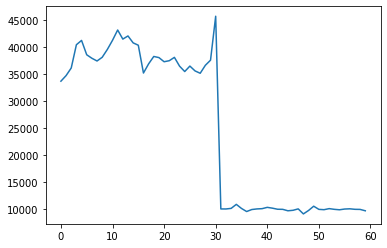

{'data': {'address': '0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9', 'updated_at': '2022-02-20T10:38:26.975212899Z', 'next_update_at': '2022-02-20T10:43:26.975213999Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Aave Token', 'contract_ticker_symbol': 'AAVE', 'contract_address': '0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 138.42262, 'open': {'balance': '28280388782184044370842', 'quote': 3914645.8}, 'high': {'balance': '28280388782184044370842', 'quote': 3914645.8}, 'low': {'balance': '28280388782184044370842', 'quote': 3914645.8}, 'close': {'balance': '28280388782184044370842', 'quote': 3914645.8}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 143.08057, 'open': {'balance': '28280388782184044370842', 'quote': 4046374.2}, 'high': {'balance': '282

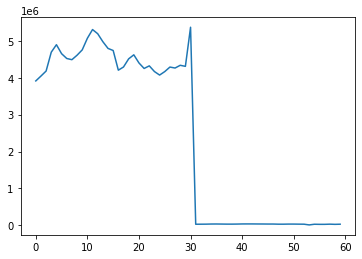

{'data': {'address': '0x3f382dbd960e3a9bbceae22651e88158d2791550', 'updated_at': '2022-02-20T10:38:29.526744385Z', 'next_update_at': '2022-02-20T10:43:29.526744765Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Matic Token', 'contract_ticker_symbol': 'MATIC', 'contract_address': '0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 1.5332829, 'open': {'balance': '34000000000000000000', 'quote': 52.13162}, 'high': {'balance': '34000000000000000000', 'quote': 52.13162}, 'low': {'balance': '34000000000000000000', 'quote': 52.13162}, 'close': {'balance': '34000000000000000000', 'quote': 52.13162}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 1.6279106, 'open': {'balance': '34000000000000000000', 'quote': 55.34896}, 'high': {'balance': '34000000000000000000'

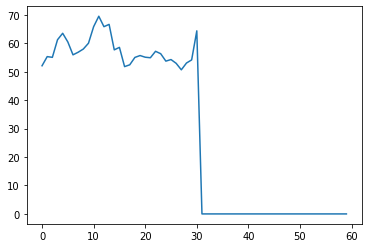

{'data': {'address': '0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab', 'updated_at': '2022-02-20T10:38:30.458543448Z', 'next_update_at': '2022-02-20T10:43:30.458543628Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Alchemist', 'contract_ticker_symbol': '⚗️', 'contract_address': '0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x88acdd2a6425c3faae4bc9650fd7e27e0bebb7ab.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 19.29365, 'open': {'balance': '249909499151754864048', 'quote': 4821.6665}, 'high': {'balance': '249909499151754864048', 'quote': 4821.6665}, 'low': {'balance': '249909499151754864048', 'quote': 4821.6665}, 'close': {'balance': '249909499151754864048', 'quote': 4821.6665}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 20.184566, 'open': {'balance': '249909499151754864048', 'quote': 5044.315}, 'high': {'balance': '249909499151754864

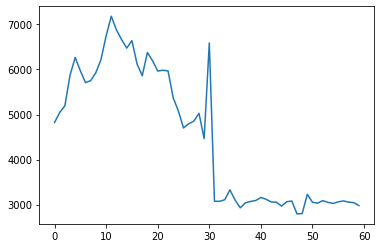

{'data': {'address': '0xdbdb4d16eda451d0503b854cf79d55697f90c8df', 'updated_at': '2022-02-20T10:38:31.820035811Z', 'next_update_at': '2022-02-20T10:43:31.820036651Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Alchemix', 'contract_ticker_symbol': 'ALCX', 'contract_address': '0xdbdb4d16eda451d0503b854cf79d55697f90c8df', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0xdbdb4d16eda451d0503b854cf79d55697f90c8df.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 137.84041, 'open': {'balance': '4445265060000000000', 'quote': 612.7371}, 'high': {'balance': '4445265060000000000', 'quote': 612.7371}, 'low': {'balance': '4445265060000000000', 'quote': 612.7371}, 'close': {'balance': '4445265060000000000', 'quote': 612.7371}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 142.26501, 'open': {'balance': '4445265060000000000', 'quote': 632.40564}, 'high': {'balance': '4445265060000000000', 'quote'

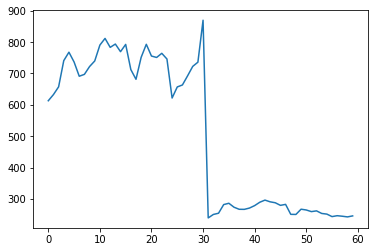

{'data': {'address': '0xd46ba6d942050d489dbd938a2c909a5d5039a161', 'updated_at': '2022-02-20T10:38:47.470840550Z', 'next_update_at': '2022-02-20T10:43:47.470841030Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 6, 'contract_name': 'Tether USD', 'contract_ticker_symbol': 'USDT', 'contract_address': '0xdac17f958d2ee523a2206206994597c13d831ec7', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0xdac17f958d2ee523a2206206994597c13d831ec7.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 1.0024868, 'open': {'balance': '426078429', 'quote': 427.138}, 'high': {'balance': '426078429', 'quote': 427.138}, 'low': {'balance': '426078429', 'quote': 427.138}, 'close': {'balance': '426078429', 'quote': 427.138}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 1.0019455, 'open': {'balance': '426078429', 'quote': 426.90735}, 'high': {'balance': '426078429', 'quote': 426.90735}, 'low': {'balance': '426078429', 'quote': 426.9073

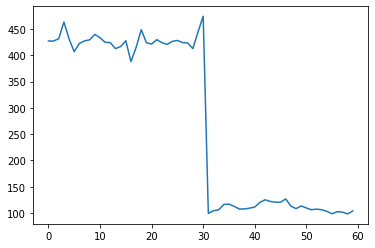

{'data': {'address': '0xa117000000f279d81a1d3cc75430faa017fa5a2e', 'updated_at': '2022-02-20T10:38:48.274520833Z', 'next_update_at': '2022-02-20T10:43:48.274521243Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Aragon Network Token', 'contract_ticker_symbol': 'ANT', 'contract_address': '0x960b236a07cf122663c4303350609a66a7b288c0', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x960b236a07cf122663c4303350609a66a7b288c0.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 8.044607, 'open': {'balance': '245666507630000000000', 'quote': 1976.2905}, 'high': {'balance': '245666507630000000000', 'quote': 1976.2905}, 'low': {'balance': '245666507630000000000', 'quote': 1976.2905}, 'close': {'balance': '245666507630000000000', 'quote': 1976.2905}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 8.539061, 'open': {'balance': '245666507630000000000', 'quote': 2097.7612}, 'high': {'balance': '245666

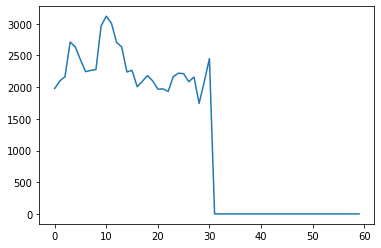

{'data': {'address': '0x1337def16f9b486faed0293eb623dc8395dfe46a', 'updated_at': '2022-02-20T10:38:49.446981060Z', 'next_update_at': '2022-02-20T10:43:49.446981220Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 8, 'contract_name': 'Monaco', 'contract_ticker_symbol': 'MCO', 'contract_address': '0xb63b606ac810a52cca15e44bb630fd42d8d1d83d', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0xb63b606ac810a52cca15e44bb630fd42d8d1d83d.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 9.584588, 'open': {'balance': '17000000000', 'quote': 1629.38}, 'high': {'balance': '17000000000', 'quote': 1629.38}, 'low': {'balance': '17000000000', 'quote': 1629.38}, 'close': {'balance': '17000000000', 'quote': 1629.38}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 10.020595, 'open': {'balance': '17000000000', 'quote': 1703.5011}, 'high': {'balance': '17000000000', 'quote': 1703.5011}, 'low': {'balance': '17000000000', 'quote': 

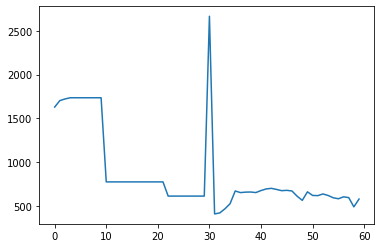

{'data': {'address': '0x3472a5a71965499acd81997a54bba8d852c6e53d', 'updated_at': '2022-02-20T10:39:06.237789069Z', 'next_update_at': '2022-02-20T10:44:06.237789539Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Dai Stablecoin', 'contract_ticker_symbol': 'DAI', 'contract_address': '0x6b175474e89094c44da98b954eedeac495271d0f', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x6b175474e89094c44da98b954eedeac495271d0f.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 1.0024868, 'open': {'balance': '10037523057593489660673', 'quote': 10062.484}, 'high': {'balance': '10037523057593489660673', 'quote': 10062.484}, 'low': {'balance': '10037523057593489660673', 'quote': 10062.484}, 'close': {'balance': '10037523057593489660673', 'quote': 10062.484}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 1.0015441, 'open': {'balance': '10037523057593489660673', 'quote': 10053.021}, 'high': {'balance': '

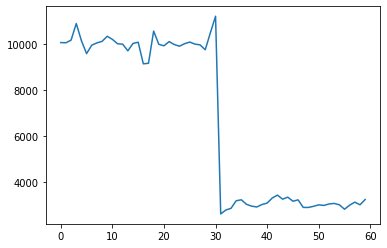

{'data': {'address': '0xba100000625a3754423978a60c9317c58a424e3d', 'updated_at': '2022-02-20T10:39:35.519502567Z', 'next_update_at': '2022-02-20T10:44:35.519503167Z', 'quote_currency': 'USD', 'chain_id': 1, 'items': [{'contract_decimals': 18, 'contract_name': 'Balancer', 'contract_ticker_symbol': 'BAL', 'contract_address': '0xba100000625a3754423978a60c9317c58a424e3d', 'supports_erc': None, 'logo_url': 'https://logos.covalenthq.com/tokens/1/0xba100000625a3754423978a60c9317c58a424e3d.png', 'holdings': [{'timestamp': '2022-02-20T00:00:00Z', 'quote_rate': 12.571768, 'open': {'balance': '5057351893445854166209', 'quote': 63579.855}, 'high': {'balance': '5057351893445854166209', 'quote': 63579.855}, 'low': {'balance': '5057351893445854166209', 'quote': 63579.855}, 'close': {'balance': '5057351893445854166209', 'quote': 63579.855}}, {'timestamp': '2022-02-19T00:00:00Z', 'quote_rate': 13.083875, 'open': {'balance': '5057351893445854166209', 'quote': 66169.76}, 'high': {'balance': '505735189344

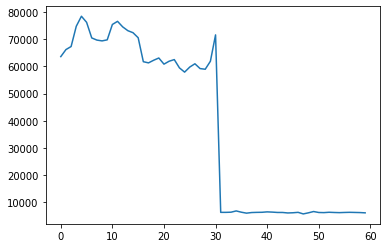

In [223]:
#fig, axs = plt.subplots(10)  
      
#fig.suptitle('Vertically stacked subplots')

for i in range(10):
  jsonmm2 = response[i].json()
  print(jsonmm2)
  df_treasury = pd.json_normalize(jsonmm2['data'])
  df_treasury_final = df_treasury[["items"]]
  df_treasury_final= df_treasury_final.explode('items')
  df_treasury_final = (pd.DataFrame(df_treasury_final["items"].apply(pd.Series)))
  #df_treasury_final.head()
  df_treasury_final2 = df_treasury_final[["holdings"]]
  df_treasury_final2= df_treasury_final2.explode('holdings')
  df_treasury_final2 = (pd.DataFrame(df_treasury_final2["holdings"].apply(pd.Series)))
  #df_treasury_final2.head()
  df_treasury_final3 = df_treasury_final2[["close"]]
  #df_treasury_final3= df_treasury_final3.explode('close')
  #df_treasury_final3 = (pd.DataFrame(df_treasury_final3["close"].apply(pd.Series)))
  #df_treasury_final3.head()

  #plt.subplot(i+1, 1, 1)

  data = []
    #last 3 months data
  for j in range(60):
    all = str(df_treasury_final3.iloc[j,0])
    all2 = ast.literal_eval(all)
    #print(i)
    #print(all2['quote'])
    data.append(all2['quote'])
    
  plt.plot(data) 
  plt.show()


    



    

# OnChain Governance Data using Subgraph

## Daohaus, Aragon Subgraph

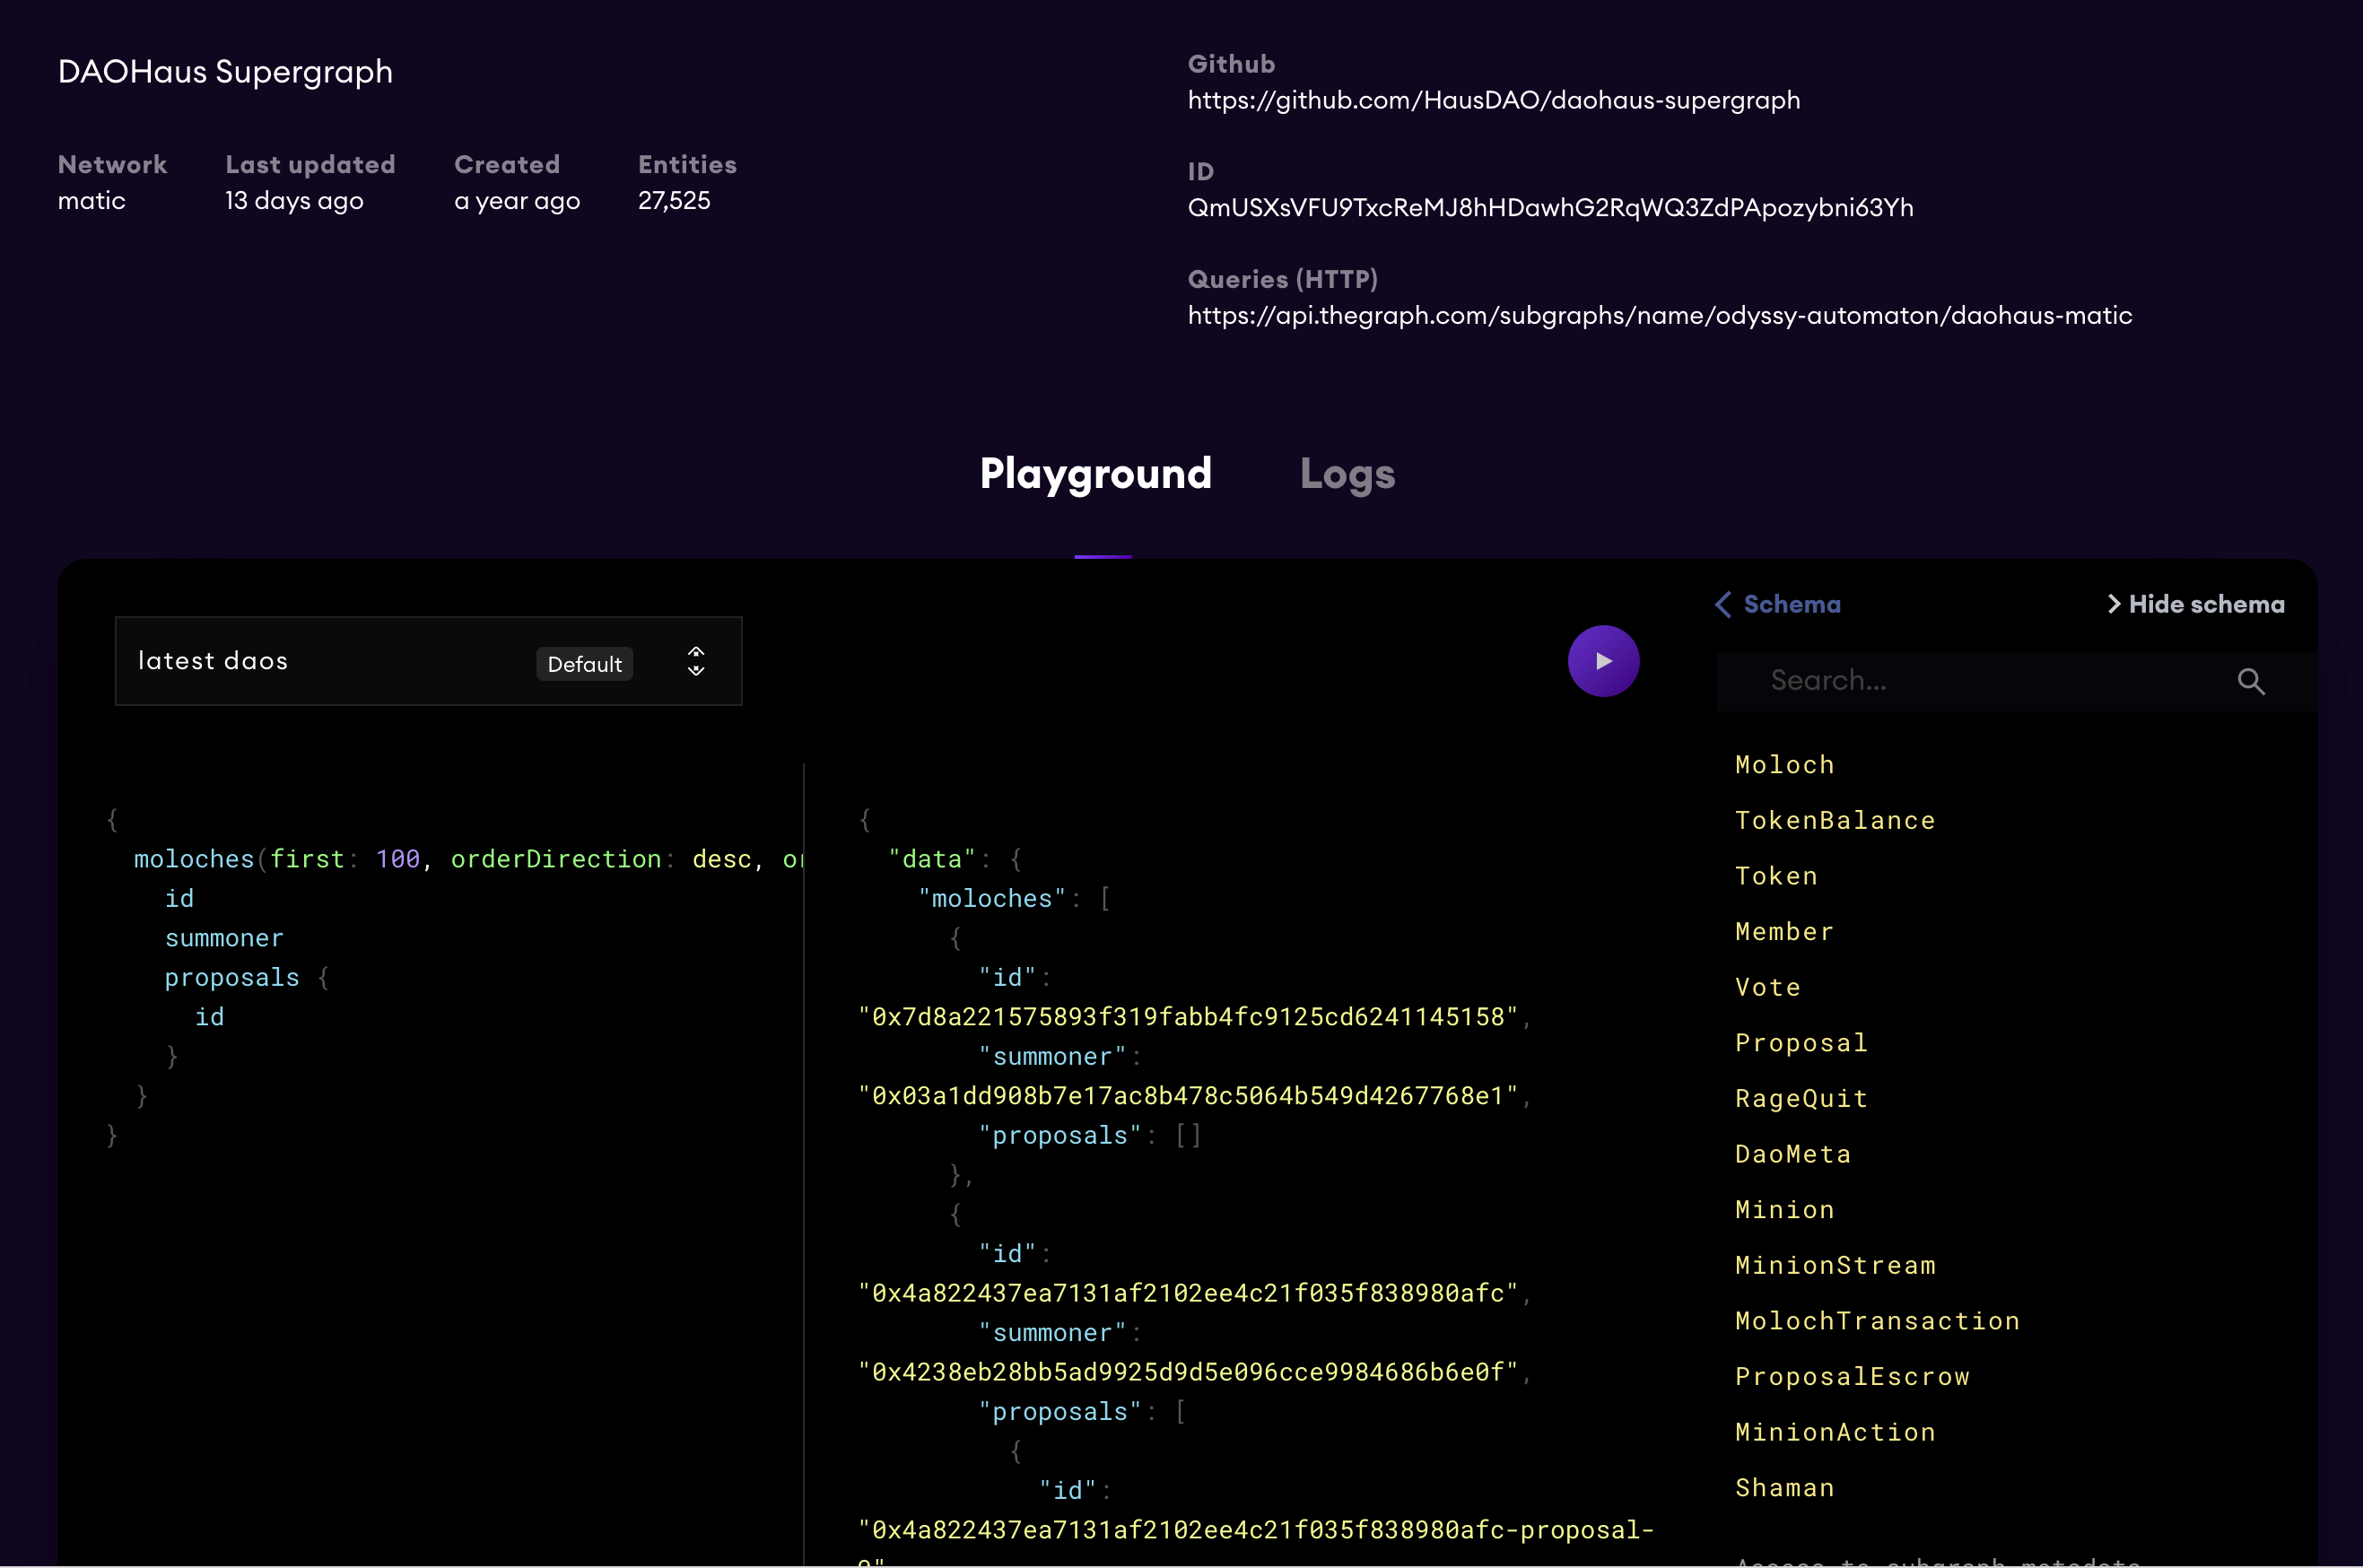

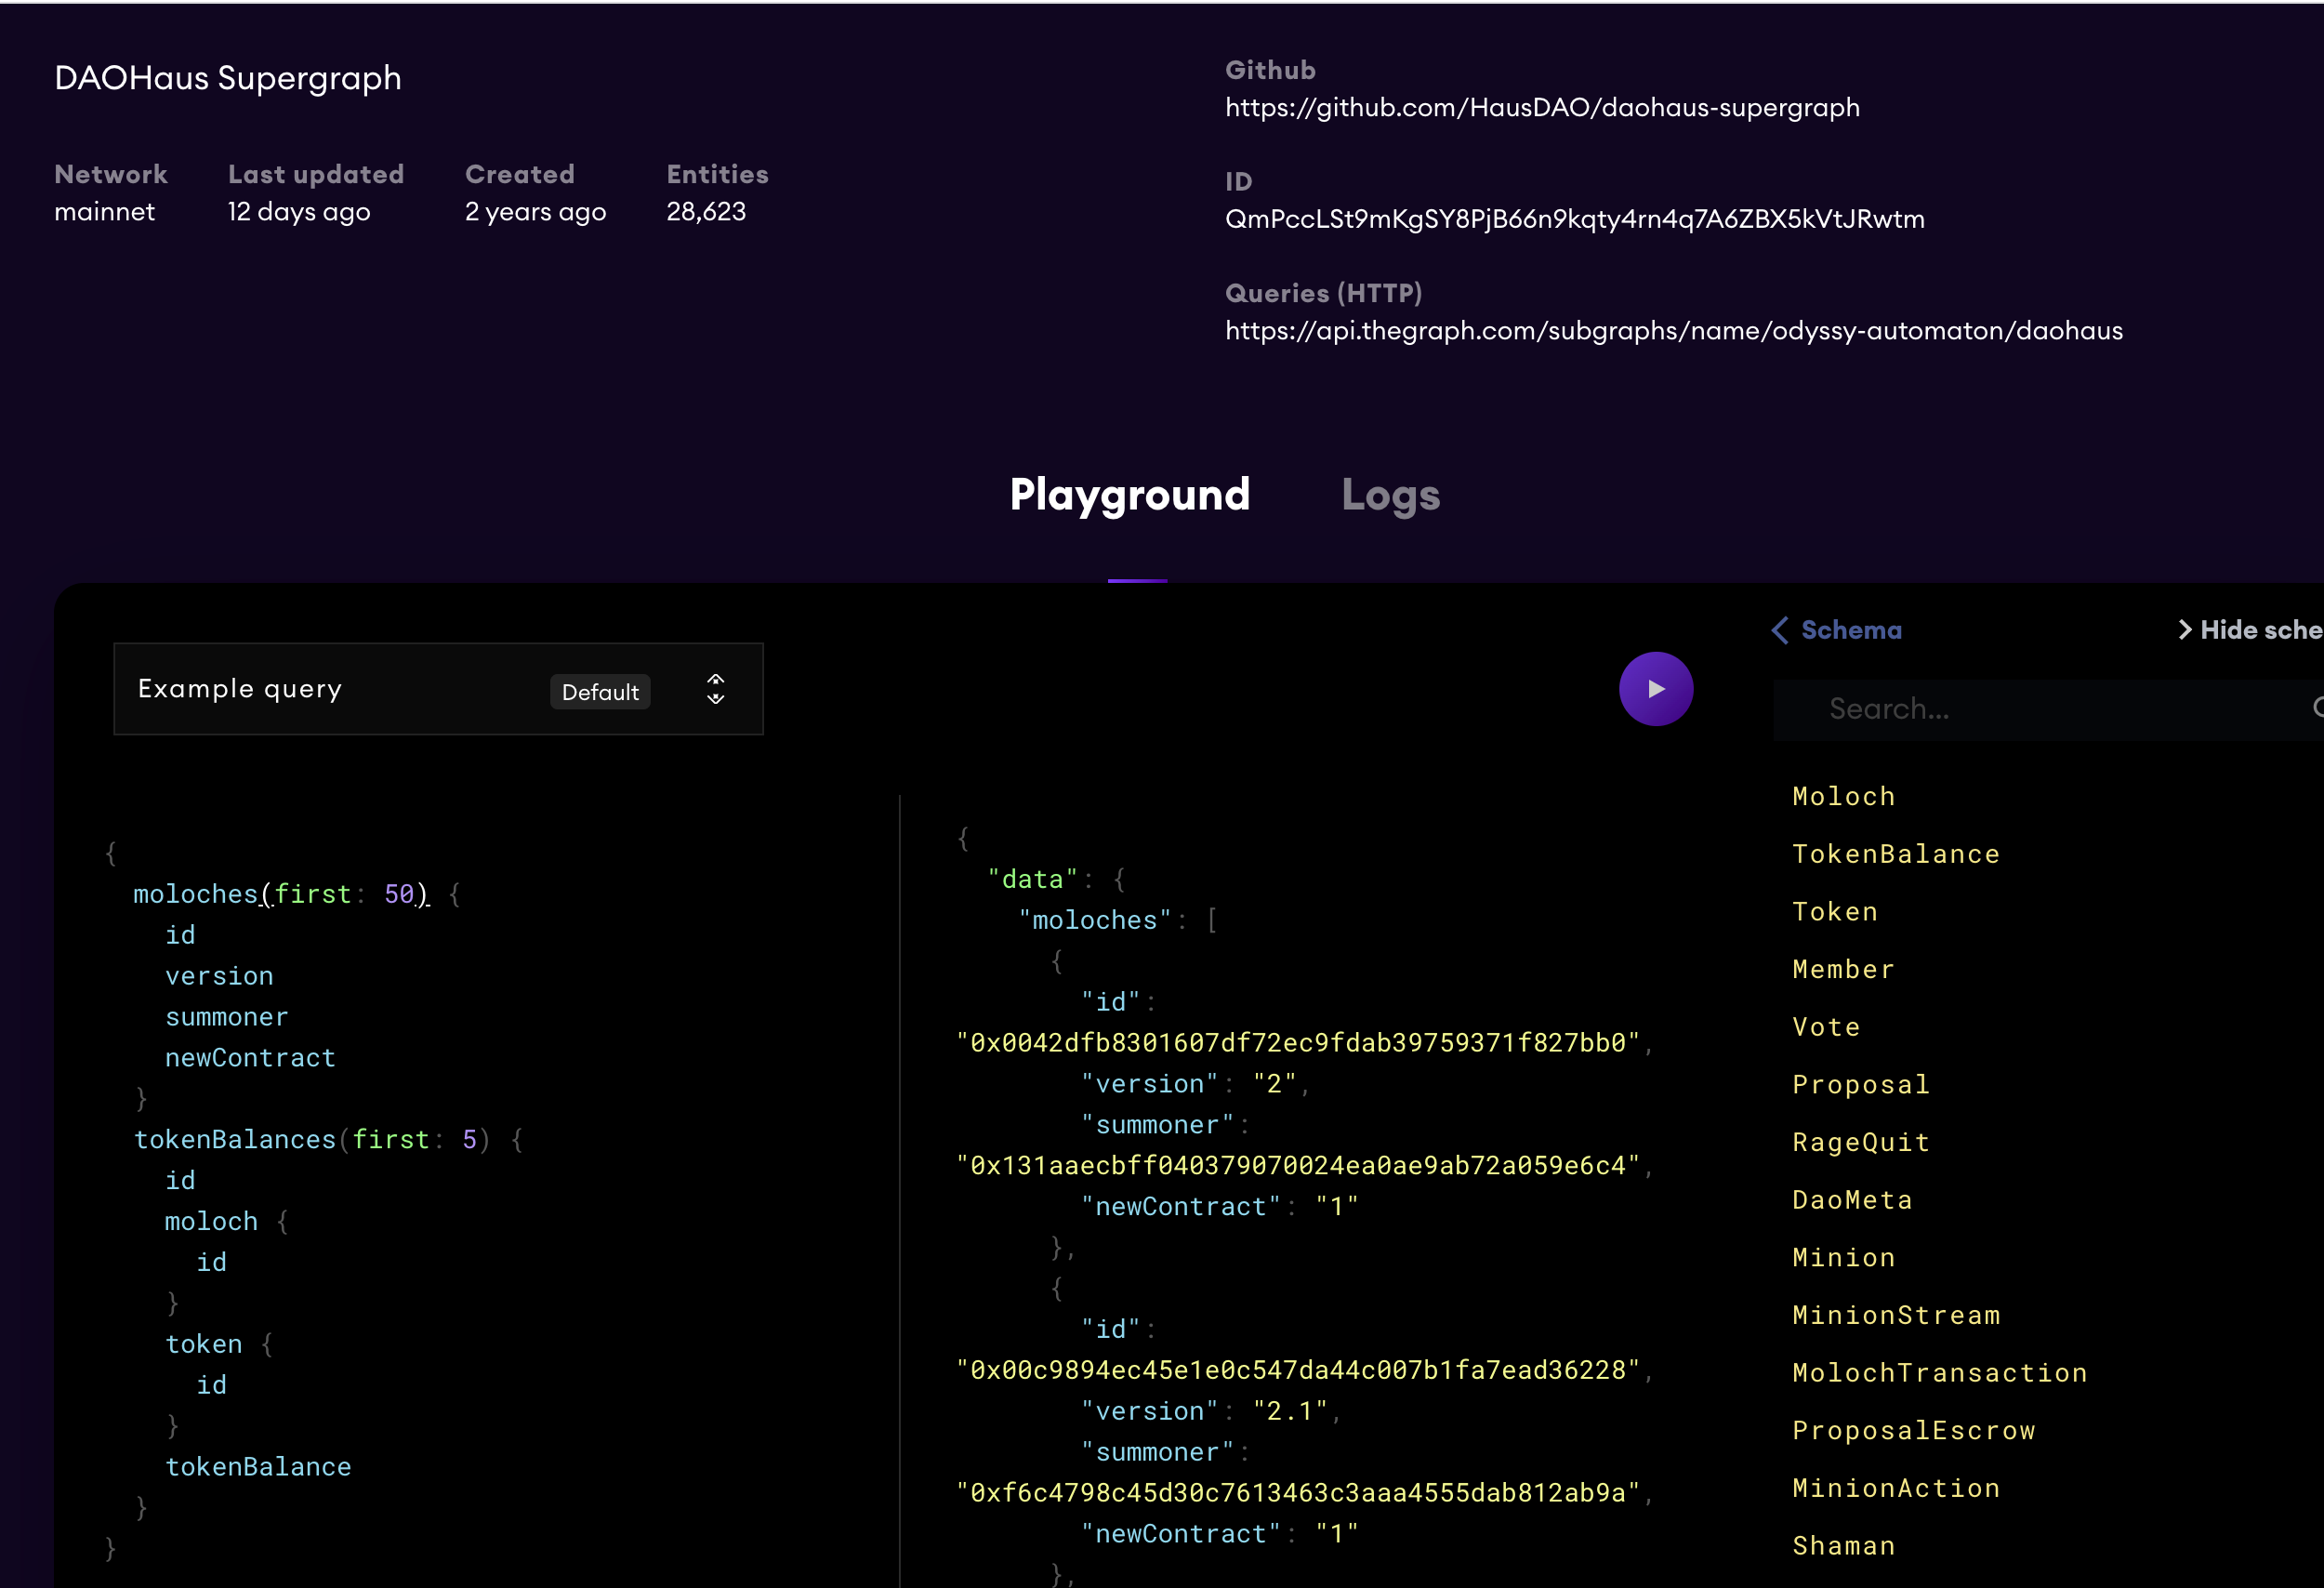